# CSCI 3022: Intro to Data Science - Spring 2018 Practicum 
***
- <span style="color:blue">Version 1.01 - clarified problem 1B (in blue text).</span>
- <span style="color:green">Version 1.02 - clarified problem 1D (in green text).</span>
- <span style="color:red">Version 1.03 - clarified problem 2D (in red text).</span>


This practicum is due on Moodle by **11:55pm on Wednesday May 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Vail Dorchester

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
import math
from matplotlib import collections  as mc
import statsmodels.api as sm 
%matplotlib inline

C:\Users\Vail Dorchester\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### [35 points] Problem 1: Malaria Parasite Problems
***

Malaria parasites are very good at evading the immune system. Each parasite's genome has 60 different versions of a key immune evasion gene, so that when you get malaria, instead of simply getting sick and then getting better, the parasite switches among its 60 genes, sequentially, thereby changing its camouflage over and over and over. This is one of the reasons that malaria is still a huge problem today: you never develop a really strong immunity to the overall parasite population, due to its huge genetic diversity. You can read more about this [here](https://www.quantamagazine.org/networks-untangle-malarias-deadly-shuffle-20151015/) if you like. 

Here we are concerned with helping out lab scientists in desigining and evaluating their genetic sequencing experiments which target _var_ genes. The setup is as follows:

* Each parasite has a repertoire of 60 different "var" genes.
* A process called PCR is applied to a parasite genome. If PCR is successful, we get the sequence of one of the var genes, drawn at random from the repertoire of 60. However, PCR might not be successful at all, in which case we get nothing. Let the probability that a PCR attempt fails be equal to $f$. 
* In other words, with probability $f$, PCR yields nothing. With probability $1-f$, PCR produces a var gene sequence, and this sequence is chosen uniformly at random from among the total 60 var genes. 
* Importantly, PCR _does not deplete the DNA in the sample_, meaning that if one repeats the PCR process, the stochastic process described above takes place again, independently of the outcome of the previous PCR.
* In other words, a repeated PCR might fail, or it might succeed. And, if it succeeds, the same gene might be sequenced _or_ a different one of the 60 genes might be sequenced.
* To be clear: repeating PCR might sample a previously sampled gene, or it might sample another one of the 60. Then again, any individual PCR fails with probability $f$.

**Part A**: Suppose you have the budget to do $r$ PCR replicates (i.e. $r$ indepedent PCR trials). Let $k$ be the number of PCRs that are successful. Since $k$ is a random variable, what is the name of its distribution? What is the expected value of $k$, and how does it depend on $r$? What is the standard deviation of $k$?

This follows a binomial distribution because the PCR process can either be successful or it can fail. The expected value is $E[x] = r(1-f)$, which scales linearly with the number of trials $r$. It is the probability of success multiplied by the number of trials. The variance is $Var[x] = r(1-f)f$, which is the probability of succes times the probability of failure times the number of trials. This yields a standard deviation of $\sigma = \sqrt{r(1-f)f}$

**Part B**: Write a function called `draw_pcr_samples(r,f,var_repertoire)` that makes $r$ repeated attemps at PCR, each with independent probability of failure $f$. This code must return a list of the successfully sequenced var genes. For your convenience, please use the list `var_repertoire` below as the 60 possible var genes that are being sampled. <span style="color:blue">When written correctly, the output of this code will change each time, depending on the success or failure of each PCR, and which var gene is chosen. To examine the output of your function, please repeatedly call it under three different conditions, and produce the following histograms: </span>
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=48$ and $f=0$. Make this histogram `blue`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=60$ and $f=0.2$. Make this histogram `green`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=120$ and $f=0.6$. Make this histogram `gold`.

In [74]:
var_repertoire = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
                  'r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H',
                 'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                 'π','ø','ß','∆','ç','Ω','µ','∞']

In [75]:
#a neato function
def draw_pcr_samples(r, f, var_repertoire):
    results = [] #i dunno just some stuff
    genes = [] #denim lol
    for i in range(r):
        #switched f to 1-f because binomial takes the probability of succes
        v = np.random.binomial(1, (1-f)) #Do a single bernoulli trial
        results.append(v) #store results
        if(v): #if PCR was successful
            g = np.random.choice(var_repertoire) #get the gene
            genes.append(g) #add it to the list of genes
    return genes

In [100]:
#generating my samples
f0 = draw_pcr_samples(48, 0, var_repertoire) #trial 1
f2 = draw_pcr_samples(60, 0.2, var_repertoire) #trial 2
f6 = draw_pcr_samples(120, 0.6, var_repertoire) #trial 3

#y data for histograms. just holds the counts
y1 = {}
y2 = {}
y3 = {}

#go through each set
for i, gene in enumerate(var_repertoire):
    #using index to know which count goes to which gene
    y1[gene] = (f0.count(gene))
    y2[gene] = (f2.count(gene))
    y3[gene] = (f6.count(gene))

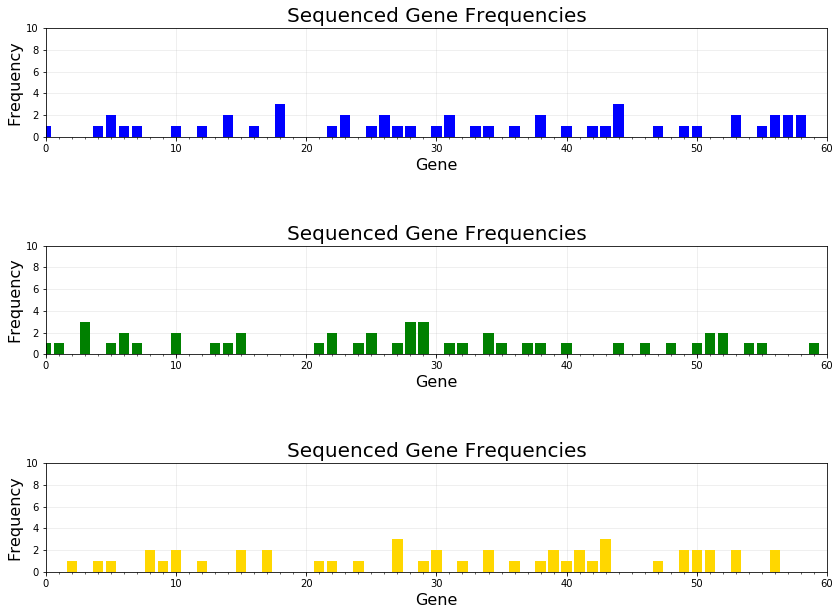

In [101]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
x = np.arange(60)

#
#
#
axes[0].bar(x, y1.values(), color='blue')
axes[0].set_xticks(x, y1.keys())
# Add titles and labels 
axes[0].set_title("Sequenced Gene Frequencies", fontsize=20)
axes[0].set_xlabel("Gene", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

#
#
#
axes[1].bar(x, y2.values(), color='green')
axes[1].set_xticks(x, y1.keys())
# Add titles and labels 
axes[1].set_title("Sequenced Gene Frequencies", fontsize=20)
axes[1].set_xlabel("Gene", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

#
#
#
axes[2].bar(x, y3.values(), color='gold')
axes[2].set_xticks(x, y1.keys())
# Add titles and labels 
axes[2].set_title("Sequenced Gene Frequencies", fontsize=20)
axes[2].set_xlabel("Gene", fontsize=16)
axes[2].set_ylabel("Frequency", fontsize=16)
# Make grid lighter and set behind data
axes[2].grid(alpha=0.25)
axes[2].set_axisbelow(True)

#
#
#
#
axes[0].set_xlim([0,60])
axes[1].set_xlim([0,60])
axes[2].set_xlim([0,60])

axes[0].set_ylim([0,10])
axes[1].set_ylim([0,10])
axes[2].set_ylim([0,10])

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=1)

**Part C**: Use your calculations in Part A to write down the expected number of successful PCRs, $k$, for each of the three scenarios that you made histograms for in Part B. What do you notice? Write it in MarkDown. Then, examine the 3 histograms generated in Part B, and explain the relationship, if any, between the histograms and your expected $k$ calculations. If making calculations or annotating the histograms is helpful in your explanation, feel free to do so. 

Succeses is number of trials multiplied by probability for succes $1-f$<br>
$$E[k] = (1-f)\times r$$
$$r = 48 \quad f = 0 \quad E[k] = 48$$
$$r = 60 \quad f = 0.2 \quad E[k] = 48$$
$$r = 120 \quad f = 0.6 \quad E[k] = 48$$

The relationship I noticed is that with the given r and f values, the expected number of successes is the same for each set of PCR trials. The histograms reflect this well because it is somewhat easy to see that the total number of counts in each histogram is roughly equal. Also, if I call len(x) on each of my lists returned from the PCR function, we can confirm that they are pretty close to equal each time.

**Part D**: Lab scientists use what's called a _96-well plate_ to do experiments. A [96-well-plate](https://www.amazon.com/SEOH-Microplates-Well-Non-Sterile-Microchemistry/dp/B0088AR7Y6) is an 8-by-12 grid of little wells in which indepedent experiments can be conducted. Professor Amy Ferguson is wondering whether to dedicate a whole plate ($r=96$ independent PCR replicates) or a half plate ($r=48$ independent PCR replicates) to her PCR experiment. Or, she wonders whether she should use a different $r$ altogether. Use your code to simulate and compute answers to the following, assuming $f=0.1$:
* In expectation, how many _unique_ genes are produced for $r=48$?
* In expectation, how many _unique_ genes are produced for $r=96$?
* If $r$ is large, then the chance that $55$ or more <span style="color:green">_unique_</span> genes are sampled will increase. Professor Ferguson needs the probability that $55$ or more <span style="color:green">_unique_</span> genes are sampled to be greater than 95%. What should $r$ be? Support your answer by creating a plot of <span style="color:green">$P(\text{at-least-55-unique-sampled} \mid r)$</span> vs $r$.

In [139]:
#get the average number of unique genes for a given r and f
def n_unique(r, f, var_repertoire, n_trials=1000):
    unique = [] # to store number of unique per trial
    for i in range(n_trials): # do a bunch of trials
        #basically calls the function, puts the returned list into a series
        #and calls nunique on that
        genes = draw_pcr_samples(r, f, var_repertoire)
        unique.append(pd.Series(genes).nunique())
    return np.mean(unique), np.std(unique)

In [140]:
un48, s48 = n_unique(48, 0.1, var_repertoire)
un96, s96 = n_unique(96, 0.1, var_repertoire)

In [143]:
print("Expected number of unique genes for f = 0.1 and r = 48 : {0:.4}".format(un48))
print("Expected number of unique genes for f = 0.1 and r = 96 : {0:.4}".format(un96))

Expected number of unique genes for f = 0.1 and r = 48 : 30.93
Expected number of unique genes for f = 0.1 and r = 96 : 45.91


Basically what I have chosen to do is get use the central limit theorem to get the mean and standard deviation for a given r, and I then passed that into the stats normal distribution and used the cumulative distribution function to find the probability that there are at 55 or fewer unique values. Knowing that we want to have a 95% probability of getting 55 or more, I incremented r until cdf(55) was only 0.05, so 95% of the time it will be equal or greater. Then for later use I turned this into a function

In [166]:
#returns r such that we get x or more unique genes a% of the time
def r_required(x, a, f):
    p = 1
    r = 1
    while(p>(1-a)):
        mu, std = n_unique(r, f, var_repertoire)
        p = stats.norm(mu, std).cdf(x)
        #print(r, p)
        if(p>=(1-a + 0.15)):
            r+=20
        elif(p>=(1-a+0.05)):
            r+=2
        else:
            r+=1
    return r

In [159]:
rr = r_required(55, 0.95, 0.1) #will print the r required to have 55 or more 95% of the time
print("r needs to be roughly {0} to achieve 55 or more unique genes 95% of the time.".format(rr))

r needs to be roughly 210 to achieve 55 or more unique genes 95% of the time.


In [153]:
#getting x and y for plot
x = np.arange(1, 250, 5)
y = []
for r in x:
    mu, std = n_unique(r, 0.1, var_repertoire)
    p = stats.norm(mu, std).cdf(55)
    y.append(1-p)

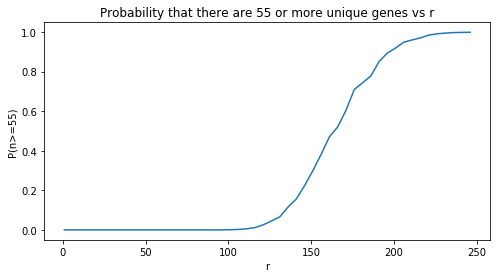

In [156]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x, y)
ax.set_title("Probability that there are 55 or more unique genes vs r")
ax.set_xlabel("r")
ax.set_ylabel("P(n>=55)")
plt.show()

This plot shows the probability that we get 55 or more unique genes vs r. We see that as r hits around 210, the probability of getting 55 or more unique samples reaches about 95%. To get a more accurate number, you'd probably want to increase the number of trials in my n_unique function, but alas, my computer will die if i do that. <br>
Basically you need r to be around 210 though.

**Part E**: Bills, bills, bills. Professory Amy Ferguson has a decision to make about her lab budget. Here are some numbers:

* Each 96-well plate costs \$5 to buy. 
* The cheap PCR reagents cost $c=$\$0.05 per well and fail with probability $f=0.3$.
* The expensive PCR reagents cost $c=$\$0.10 per well and fail with probability $f=0.1$.
* The premium PCR reagents cost $c=$\$0.20 per well and fail with probability $f=0.05$.

Amy needs at least 50 unique sequences from a particular parasite genome for her experiment to be considered a success. She also knows that this whole PCR thing is a stochastic process, so while she might get 50 unique sequences in just $r=50$ attempts, that's going to be pretty rare. Still, increasing $r$ will increase the probability of success, i.e. of getting $\geq50$ unique sequences. 

Turns out, she needs to success with probability of at least 0.95. She could achieve this using the cheap reagents, the expensive reagents, or the premium reagents. Naturally, she'd need to buy more of the cheaper reagents, but... the tradeoff isn't clear. 

Help! Which reagents should she choose? State your answer clearly as a recommendation, and explain why you recommend that. Use figures and calculations as necessary to support your case.

You may assume:
* A 96-well plate costs \$5 even if fewer than 96 of the wells are actually used. For example, using 97 wells costs \$10, since it uses two plates.
* Reagents are billed on a per-well basis, not on a per-plate basis.
* The goal is to sample 50 or more unique sequences 95\% of the time or greater, but for as little money as possible.

In [167]:
#defining my stuff
plate_cost = 5

#reagent costs
crc = 0.05 #my naming convention is crc stands for cheap reagent cost and so on
erc = 0.1
prc = 0.2

#reagent probabilities
crf = 0.3 #cheap reagent fail
erf = 0.1
prf = 0.05

In [168]:
#naming convention is crr = cheap reagent r-required
crr = r_required(50, 0.95, crf) #r required to get a success
err = r_required(50, 0.95, erf) #r required to get a success
prr = r_required(50, 0.95, prf) #r required to get a success

In [173]:
cheap_cost = (math.ceil(crr/96)*plate_cost) + (crr * crc)
expen_cost = (math.ceil(err/96)*plate_cost) + (err * erc)
premi_cost = (math.ceil(prr/96)*plate_cost) + (prr * prc)
print("R required for cheap: {0}".format(crr))
print("R required for expensive: {}".format(err))
print("R required for premium: {0}".format(prr))
print('\n')
print("Cost using cheap reagent {0:.4}".format(cheap_cost))
print("Cost using expensive reagent {0:.4}".format(expen_cost))
print("Cost using premium reagent {0:.4}".format(premi_cost))

R required for cheap: 192
R required for expensive: 149
R required for premium: 142


Cost using cheap reagent 19.6
Cost using expensive reagent 24.9
Cost using premium reagent 38.4


She should use the cheap reagents. The total cost would be smallest with those.

### [35 points] Problem 2: Parental Leave
***

The file `leave.tsv` is in the data folder. It contains information on paid parental leave policies for US and Canadian institutions for tenure-track professors. 

Answer the following questions and provide both _pseudocode_ and code for each question. In other words, in a #comment, explain what your code is doing in each step, and give the reader a brief hint as to why that's a good or necessary step. (This is what we mean by pseudocode.)  Then, provide the code that answers the question. 

Note that `pandas` is your friend here. Also, note that the researchers who assembled `leave.tsv` may have coded missing data in a variety of ways, so you'll need to explore the file to learn what those are. 

**Part A**: Figure out what a `.tsv` file is and how to load it in using `pandas`. Call your dataframe `dfLeave`. **Note** that, as in many real-life data science tasks, there is no code to import this file type in any of our in-class notebooks or homeworks; This step will require a web search.

Seems to be a tab separated value file. So just read csv with sep = '\t'. this changes the delimiter to a tab

In [223]:
path = './data/leave.tsv'
dfLeave = pd.read_csv(path, sep='\t')

In [224]:
dfLeave.head()

,university_name,short_name,is_private,rank,rank_ind,census_region,missing,paid_leave_len_woman,paid_leave_len_woman_units,paid_leave_weeks_woman,relief_woman,paid_leave_len_man,paid_leave_len_man_units,paid_leave_weeks_man,relief_man,link,notes,date
0,Arizona State University,Arizona State,0,108.72,101,West,0,6.0,week,6.0,Not specified,6.0,week,6.0,Not specified,https://provost.asu.edu/academic-personnel/par...,.,2/22/18
1,Auburn University,Auburn,0,126.69,122,South,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,https://cws.auburn.edu/shared/content/files/85/,FMLA,2/22/18
2,Boston University,Boston,1,51.73,44,Northeast,0,1.0,term,14.0,Other,1.0,term,14.0,Other,https://www.bu.edu/handbook/leaves-absences/fa...,"Full semester for either parent, relief is FUL...",2/22/18
3,Brandeis University,Brandeis,1,84.55,78,Northeast,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://www.brandeis.edu/humanresources/docume...,.,2/22/18
4,Brigham Young University,Brigham Young,1,166.53,180,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible,Staff leave is 6wk,2/22/18


**Part B**: Answer the following summary questions:
* How many institutions are in the dataset? 
* How many actually have parental leave data in the `paid_leave_len_woman` column? 
* How many private institutions are there? 
* How many institutions have a note associated with them?

For pseudocode, This is basically just using loc to index the data to get each answer. shape[0] returns the number of columns which is usually what was asked (number of universities with x)

In [239]:
n1 = dfLeave['university_name'].nunique()
n2 = dfLeave[dfLeave['paid_leave_len_woman'].notnull()].shape[0]
n3 = dfLeave.loc[dfLeave['is_private']==1].shape[0]
n4 = dfLeave.loc[dfLeave.notes!='.'].shape[0]

In [240]:
print("There are {0} institutions".format(n1))
print("{0} have data in the paid_leave_len_woman column".format(n2))
print("{0} are private".format(n3))
print("{0} have notes".format(n4))

There are 205 institutions
197 have data in the paid_leave_len_woman column
53 are private
174 have notes


**Part C**: Is there statistical evidence at the $\alpha=0.05$ level that public and private institutions have different _average paid parental leave durations_? Answer the question separately for men and for women. Note that the researchers have conveniently included a column that converts durations into weeks so that policies can be compared across institutions, even if some are on semesters or quarters, etc. 

Basically, I slice the frame into private and public, then make series for men and women at private and public, and then calculate the deviations and means. Then i'm going to put them into hypothesis tests but that will likely be in a lower cell.

In [241]:
#slice the frame
public = dfLeave.loc[dfLeave['is_private']==0]
private = dfLeave.loc[dfLeave['is_private']==1]

#Getting the leave times for men and women
puw_leave = public['paid_leave_weeks_woman']
pum_leave = public['paid_leave_weeks_man']
prw_leave = private['paid_leave_weeks_woman']
prm_leave = private['paid_leave_weeks_man']

#Getting means and standard deviations
#for naming, pu means public, pr private, w women, m men, u is mean, s is std
puwu = puw_leave.mean() #public women mean
pumu = pum_leave.mean() #public men mean
prwu = prw_leave.mean() #private women mean
prmu = prm_leave.mean() #private men mean

#deviations
puws = puw_leave.std() #public women mean
pums = pum_leave.std() #public men mean
prws = prw_leave.std() #private women mean
prms = prm_leave.std() #private men mean

#getting n
puwn = np.sum(puw_leave)
pumn = np.sum(pum_leave)
prwn = np.sum(prw_leave)
prmn = np.sum(prm_leave)

Hypotheses for Men:<br>
$H_0: \mu_{public} - \mu_{private} = 0 \\ H_1: \mu_{public} - \mu_{private} \neq 0 $<br>
Hypotheses for Women:<br>
$H_0: \mu_{public} - \mu_{private} = 0 \\ H_1: \mu_{public} - \mu_{private} \neq 0 $<br>
I guess I'm gonna use a two-tailed P-value test. Will reject the null hypothesis if p < 0.05 where $ p = 2 \times \min\{\Phi(Z), 1-\Phi(Z)\} $

In [242]:
#for men
men_se = np.sqrt((pums**2)/pumn + (prms**2)/prmn)
men_z = (pumu - prmu)/men_se 
men_p = 2*np.min([stats.norm.cdf(men_z), 1-stats.norm.cdf(men_z)])

#for women
women_se = np.sqrt((puws**2)/puwn + (prws**2)/prwn)
women_z = (puwu - prwu)/women_se 
women_p = 2*np.min([stats.norm.cdf(women_z), 1-stats.norm.cdf(women_z)])

In [243]:
print("P value for difference between means for men {0}".format(men_p))
print("P value for difference between means for women {0}".format(women_p))

P value for difference between means for men 5.751747907939993e-11
P value for difference between means for women 1.1483636634109926e-08


We are able to reject both null hypotheses because both p-values are below our alpha value. So, we can say at the $\alpha = 0.05$ level that there is a difference between the mean leave time granted to men at public universities and leave time granted to men at private universities. We can also say the same about leave time granted to women at public and private universities.

**Part D**: Some institutions provide zero weeks of paid parental leave. For each `census_region` in the dataset, create a 95% confidence interval for the _proportion of universities that offer zero paid parental leave to their professors_. <span style="color:red">Since a policy may offer paid parental leave to men, women, both, or neither, please consider a policy that offers any paid parental leave to men _or_ women _or_ both to qualify as non-zero paid parental leave. For example, a university that offers women 6 weeks and men 0 weeks _does_ qualify as a non-zero paid parental leave policy</span>. Based on your observations, is there evidence that policies vary significantly by census region? 

Please note that the number of data points varies from one census region to another, and therefore, different methods may be required to compute confidence intervals for the proportions in different census regions. _Clearly_ state which methods were used to create each confidence interval.

For clarity, please plot your confidence intervals as vertical bars in a single plot. From left to right, please plot in the order `Canada`, `Northeast`, `Midwest`,`South`, `West`.

First I'm going to create a column called total leave. If it is zero, we know that that university does not offer paid leave. If it is Nan, we know that either the men or the women or both fields were missing, because a number plus Nan is Nan. Since Nan's aren't helpful, I'll ignore rows where total_leave is Nan, then group by region. probably gonna have to bootstrap for the Canadian region because there are only 19 samples total. Looking back, I think I way overcomplicated this with all the new dataframes, but I kinda just went with it.

In [290]:
#adding total leave
dfLeave['total_leave'] = dfLeave['paid_leave_weeks_woman'] + dfLeave['paid_leave_weeks_man']

#dropping where leave is nan, then grouping by census region
#I then apply a lambda function to each group to get the number of
#universities with no pay per region. Probs gonna use value_counts
#to get the number of universities per region.
uni_per_region = dfLeave.dropna(subset=['total_leave']).census_region.value_counts()
noleave_per_region = dfLeave.dropna(subset=['total_leave']).groupby('census_region').apply(lambda df: df.loc[df['total_leave']==0].shape[0])

In [291]:
#sort them
uni_per_region.sort_index(inplace=True)
noleave_per_region.sort_index(inplace=True)
#make a new dataframe out of these
info = {'total':uni_per_region, 'no_leave':noleave_per_region} #dict
df = pd.DataFrame(data=info).reset_index() #make dict into frame
df['proportion'] = df['no_leave'] / df['total'] #get proportions
df.head()

,census_region,no_leave,total,proportion
0,Canada,3,19,0.157895
1,Midwest,16,38,0.421053
2,Northeast,13,44,0.295455
3,South,32,58,0.551724
4,West,12,38,0.315789


In [326]:
#now actually getting the intervals. i'll do canada later since n<30
a = 0.05
z = 1.96

#i'll just overwrite canada's later
df['interval'] = z * np.sqrt((df['proportion']*(1-df['proportion']))/df['total'])

#now bootstrap for canada. Going to make a separate list to preserve my frame
#and bootsrap off of that. There's 19 total, 3 have no leave, so I'll
#represent it as a list of binary values
canada = [0]*19 #init all to 0
canada[0] = canada[1] = canada[2] = 1 #set the 3 to 1
num = 5000 #number of bootstraps

#this will give me a 2d array where each row is a resample i can iterate over
b = np.array([np.random.choice(canada, replace=True, size=len(canada)) for ii in range(num)])
prop = [] #init
n = len(canada) #save some compute time
for resample in b: #get all proportions
    prop.append(np.sum(resample)/n)
cp = df.loc[df['census_region']=='Canada', 'proportion'] = np.mean(prop) #add to can

#getting upper and lower
cU, cL = np.percentile(prop, 97.5), np.percentile(prop, 2.5)
nU, nL = df.loc[df['census_region']=='Northeast', 'proportion'] + df.loc[df['census_region']=='Northeast', 'interval'], df.loc[df['census_region']=='Northeast', 'proportion'] - df.loc[df['census_region']=='Northeast', 'interval']
mU, mL = df.loc[df['census_region']=='Midwest', 'proportion'] + df.loc[df['census_region']=='Midwest', 'interval'], df.loc[df['census_region']=='Midwest', 'proportion'] - df.loc[df['census_region']=='Midwest', 'interval']
sU, sL = df.loc[df['census_region']=='South', 'proportion'] + df.loc[df['census_region']=='South', 'interval'], df.loc[df['census_region']=='South', 'proportion'] - df.loc[df['census_region']=='South', 'interval']
wU, wL = df.loc[df['census_region']=='West', 'proportion'] + df.loc[df['census_region']=='West', 'interval'], df.loc[df['census_region']=='West', 'proportion'] - df.loc[df['census_region']=='West', 'interval']

Here i used a line collection to  make it easier to plot

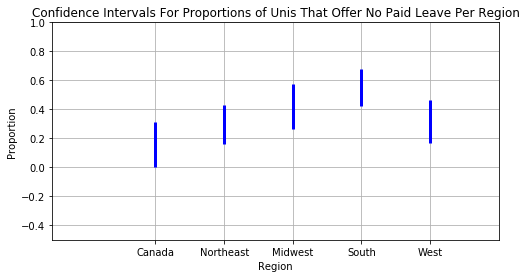

In [327]:
#now after that super unecessary dataframe manipulation, plotting.

lines = [[(1, cL),(1, cU)],[(2,nL),(2,nU)],[(3,mL),(3,mU)],[(4,sL),(4,sU)],[(5,wL),(5,wU)]]
co = np.array([(0,0,1,1),(0,0,1,1),(0,0,1,1),(0,0,1,1),(0,0,1,1)])
linec = mc.LineCollection(lines, colors=co, linewidths=3)
labels = np.array(['Canada','Northeast','Midwest','South','West'])

fig, ax = plt.subplots(figsize=(8,4))
ax.add_collection(linec)
ax.set_xlim(-0.5, 6)
ax.set_ylim(-0.5, 1)
ax.set_title("Confidence Intervals For Proportions of Unis That Offer No Paid Leave Per Region")
ax.set_xlabel("Region")
ax.set_ylabel("Proportion")
plt.xticks([1,2,3,4,5], labels)
ax.grid()
ax.legend()
plt.show()

### [30 points] Problem 3: Multiple Linear Otter-gression 
***

After years of study and professional development, you have finally landed your dream job as lead otter scientist.  It is a [dream job](https://www.youtube.com/watch?v=IXFqLIBHm-E). As your first project, you wish to use multiple linear regression to understand and predict what makes otters Instagrammable, as measured during many observations of otters, conducted by students.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file `otters.csv`. 

**Response**: 

- $\texttt{instagrammability}$: The instagrammability of a particular otter, measured by a complicated formula involving likes, comments, DMs, reposts, and new followers.

**Features**: 

- $\texttt{urchin color}$: the depth of color of the urchins nearby, measured in Wongs. 
- $\texttt{fur fluff}$: the fluff factor of the otter's fur, measured in Ketelsens.
- $\texttt{adorbz}$: unknown variable. The students keep writing it down. Units unknown.
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{majesty}$: the majesty of this particular otter in this particular photo, measured as a fraction of maximum majesty (between 0 and 1). 
- $\texttt{observer GPA}$: the GPA of the student who recorded the data.
- $\texttt{paw size}$: measured as some kind of deviation away from the median paw size. Units unknown.
- $\texttt{paw grip}$: grip strength of paw (estimated) measured in Grochows. 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at Etai's
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on the day of observation


**Part A**: Read the data from **otters.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

Simply importing, dropping, and showing the head to check. I then ran a lambda function over the string rows to format them.

In [4]:
path = './data/otters.csv'
otters = pd.read_csv(path)
otters.dropna(inplace=True)
otters.head()

,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,89.1ƭ,6.8ɭ,263.0,62℉,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4ƭ,8.0ɭ,264.0,63℉,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9ƭ,7.6ɭ,243.0,55℉,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1ƭ,6.0ɭ,260.0,52℉,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6ƭ,8.1ɭ,251.0,57℉,0.89,2.40,-6.0,43.0,186.0,0.0


In [5]:
otters['fur fluff'] = otters['fur fluff'].apply(lambda x: int(str(x)[:1]))#format temp
otters['urchin color'] = otters['urchin color'].apply(lambda x: int(str(x)[:1]))#format temp
otters['temp'] = otters['temp'].apply(lambda x: int(str(x)[:2]))#format temp
otters.head()

,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,8,6,263.0,62,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,9,8,264.0,63,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,8,7,243.0,55,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,8,6,260.0,52,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,9,8,251.0,57,0.89,2.40,-6.0,43.0,186.0,0.0


In [6]:
#Also gonna split it to have a train set
predictors = otters.iloc[:,1:] #all but response
response = otters['instagrammability'] #response

**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

Basically I fitted a model to the data and then used model.summary() to get a summary of the model that showed p values and the f statistic, and the p value for the f statistic. From looking at this, it was pretty easy to see that the f statistic was 267, which indicates there may be a relation between at least one of the predictors, and the p value was significantly lower than our $\alpha = 0.05$, so we are able to say on that alpha level that at least one feature is related to the response.

In [7]:
#make the model, fit it, and show it
predictors = sm.add_constant(predictors) 
model = sm.OLS(response, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      instagrammability   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     267.3
Date:                Thu, 03 May 2018   Prob (F-statistic):           7.62e-54
Time:                        14:34:42   Log-Likelihood:                -281.10
No. Observations:                  85   AIC:                             584.2
Df Residuals:                      74   BIC:                             611.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.3994     15.732      2.377      0.020       6.053      68.746
urchin color       1.4669      0.824      1.781      0.079      -0.174       3.108
fur fluff          4.1203      0.907      4.544      0.000       2.313       5.927
adorbz             0.4793      0.053      9.099      0.000       0.374       0.584
temp              -1.0835      0.118     -9.168      0.000      -1.319      -0.848
majesty           -0.7120      5.549     -0.128      0.898     -11.769      10.345
observer GPA       1.0607      1.411      0.752      0.455      -1.750       3.872
paw size           4.9749      0.114     43.726      0.000       4.748       5.202
paw grip          -0.0038      0.021     -0.178      0.859      -0.046       0.039
ice cream sold     0.0115      0.016      0.702      0.485      -0.021       0.044
shark attacks      1.5712      1.002      1.568      0.121      -0.425       3.567
==============================================================================
Omnibus:                        6.365   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.948
Skew:                           0.492   Prob(JB):                       0.0511
Kurtosis:                       3.842   Cond. No.                     6.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part C**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement `foward_select` yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

Basically I took in the dataframe, then I split it into predictors and response, then I iterated up to maxk in order to get that numer of features. Then, for each iteration, i made a model that was fit on each feature and picked the one with the largest coefficient of determination. I then added that feature to the bestk list and did it again, this time fitting on bestk appended with each feature. In this way, forward selection was performed to iteratively find the maxk most immportant features.

In [432]:
def forward_select(df, resp_str, maxk):
    #make the model, fit it, and show it
    Y = df[resp_str] #make y
    X = df.drop(labels = resp_str, axis=1) # make x
    
    features = list(X.columns) #list of features

    X = sm.add_constant(X) # add constants
    
    bestk = [] #holds best features
    
    #get k best
    for i in range(maxk):
        bestR = 0 #temp
        bestFeat = '' #temp
        for pred in features: #go through all the features
            #print(pred)
            if(pred in bestk): #if already selected, skip
                continue
            bestk_temp = bestk.copy() #set temp list of features
            bestk_temp.append(pred) #append temp list
            #print(bestk_temp)
            r = sm.OLS(Y, df[bestk_temp]).fit().rsquared #get accuracy
            
            #check if r squared is highest
            if r > bestR:
                bestFeat = pred
                bestR = r
        bestk.append(bestFeat) #add best feature to list
    return bestk

In [433]:
forward_select(otters, 'instagrammability', 5)

['adorbz', 'paw size', 'temp', 'fur fluff', 'urchin color']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

Basically I just fit a model and pulled out the parameters.

In [434]:
best=forward_select(otters, 'instagrammability', 5) #get best features
predictors = otters[best] #get predictors
predictors = sm.add_constant(predictors)  #add constants
response = otters['instagrammability']
model_best = sm.OLS(response, predictors).fit() #fit model
model_best.params #get slopes

const           38.807818
adorbz           0.476365
paw size         4.968635
temp            -0.977070
fur fluff        3.823208
urchin color     1.587709
dtype: float64

$Instagrammability = 38.8078 + 0.47adorbz + 4.96pawsize - 0.97temp + 3.82furfluff + 1.58urchincolor$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

Well I was going to perform a hypothesis test using F statistics and anova, but alas I ran out of time. I had a lot of final projects this week and this got pushed back.

In [436]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      instagrammability   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     267.3
Date:                Wed, 02 May 2018   Prob (F-statistic):           7.62e-54
Time:                        23:53:36   Log-Likelihood:                -281.10
No. Observations:                  85   AIC:                             584.2
Df Residuals:                      74   BIC:                             611.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.3994     15.732      2.377      0.020       6.053      68.746
urchin color       1.4669      0.824      1.781      0.079      -0.174       3.108
fur fluff          4.1203      0.907      4.544      0.000       2.313       5.927
adorbz             0.4793      0.053      9.099      0.000       0.374       0.584
temp              -1.0835      0.118     -9.168      0.000      -1.319      -0.848
majesty           -0.7120      5.549     -0.128      0.898     -11.769      10.345
observer GPA       1.0607      1.411      0.752      0.455      -1.750       3.872
paw size           4.9749      0.114     43.726      0.000       4.748       5.202
paw grip          -0.0038      0.021     -0.178      0.859      -0.046       0.039
ice cream sold     0.0115      0.016      0.702      0.485      -0.021       0.044
shark attacks      1.5712      1.002      1.568      0.121      -0.425       3.567
==============================================================================
Omnibus:                        6.365   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.948
Skew:                           0.492   Prob(JB):                       0.0511
Kurtosis:                       3.842   Cond. No.                     6.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [435]:
model_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      instagrammability   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     547.5
Date:                Wed, 02 May 2018   Prob (F-statistic):           9.27e-60
Time:                        23:53:32   Log-Likelihood:                -282.82
No. Observations:                  85   AIC:                             577.6
Df Residuals:                      79   BIC:                             592.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.8078     13.975      2.777      0.007      10.992      66.624
adorbz           0.4764      0.049      9.660      0.000       0.378       0.575
paw size         4.9686      0.108     46.183      0.000       4.754       5.183
temp            -0.9771      0.046    -21.428      0.000      -1.068      -0.886
fur fluff        3.8232      0.837      4.565      0.000       2.156       5.490
urchin color     1.5877      0.799      1.987      0.050      -0.003       3.178
==============================================================================
Omnibus:                        7.181   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.669
Skew:                           0.574   Prob(JB):                       0.0356
Kurtosis:                       3.752   Cond. No.                     4.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict an otter's instagrammability when the following features are observed: 

- $\texttt{urchin color}$: 93 Wongs
- $\texttt{fur fluff}$: 8.2 Ketelsens
- $\texttt{adorbz}$: 273
- $\texttt{temp}$: 46F 
- $\texttt{majesty}$: 0.79 
- $\texttt{observer GPA}$: 3.50 
- $\texttt{paw size}$: -10 
- $\texttt{paw grip}$: 55 Grochows
- $\texttt{ice cream sold}$: 130
- $\texttt{shark attacks}$: 3 